### mstel_mhalo_distribution
- This script looks at the distribution of mstel vs mhalo and then colours on various properties.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy

import imp 
imp.reload(catalog)
imp.reload(catalog_plot)
imp.reload(catalog_process)
imp.reload(catalog_init)

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [78]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/mstel_mhalo_distributions/'

# initiating catalog class objects.
total = catalog.Catalog(basepath)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath)
total.remove_satellites(keep_zero_mass=False) # keeping 100 galaxies without halo mass definitions (but have central definitions etc.)

# creating copies of these objects and cutting on morphology.
ltgs = copy.deepcopy(total) 
ltgs.select_morphology('ltg')

etgs = copy.deepcopy(total) 
etgs.select_morphology('etg')

unclassified = copy.deepcopy(total)
unclassified.select_morphology('unclassified')

/Users/chrisduckworth/astronomy/projects/spin_bias/scripts/catalog_init.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['stellar_to_halo_ratio'] = np.log10(tab['nsa_elpetro_mass']) -  tab['halo_mass_stel']


### Making a series of row plots that show the distributions coloured on a property split into morphs.

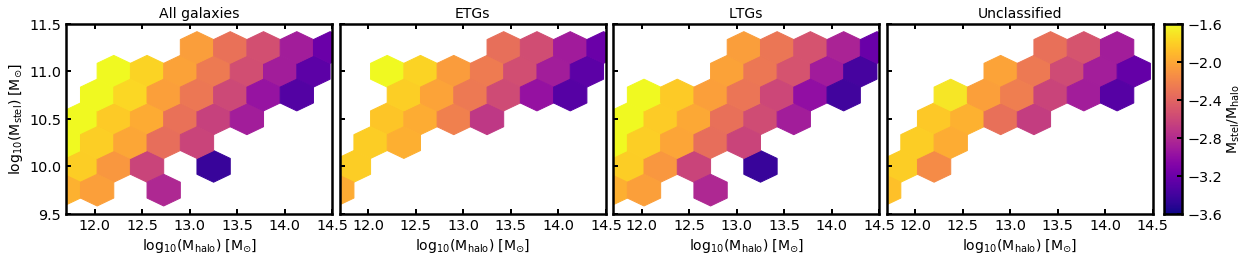

In [204]:
# Set up figure and image grid
fig= plt.figure(figsize=(20, 5))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

extent = [11.5, 15, 9, 11.5]
vrange = [-3.6, -1.6]
grid = 10 
hb = total.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[0], C=total.df.stellar_to_halo_ratio.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])
hb = etgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[1], C=etgs.df.stellar_to_halo_ratio.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])
ltgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[2], C=ltgs.df.stellar_to_halo_ratio.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])
unclassified.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[3], C=unclassified.df.stellar_to_halo_ratio.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])

# Colorbar
cb = ax[0].cax.colorbar(hb)
cb.set_label_text('$\mathrm{M_{stel} / M_{halo}}$', fontsize=14)
ax[0].cax.toggle_label(True)

titles = ['All galaxies', 'ETGs', 'LTGs', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.set_xlabel('$\mathrm{log_{10}(M_{halo}) \; [M_{\odot}]}$', fontsize=14)
    axis.set_title(titles[ind], fontsize=14)
    
ax[0].set_ylabel('$\mathrm{log_{10}(M_{stel}) \; [M_{\odot}]}$', fontsize=14)
ax[0].set_ylim([9.5, 11.5])
ax[0].set_xlim([11.7, 14.5])

plt.savefig(outpath+'mstel_mhalo_c-ratio-double-bin.pdf', format='pdf', bbox_inches='tight')


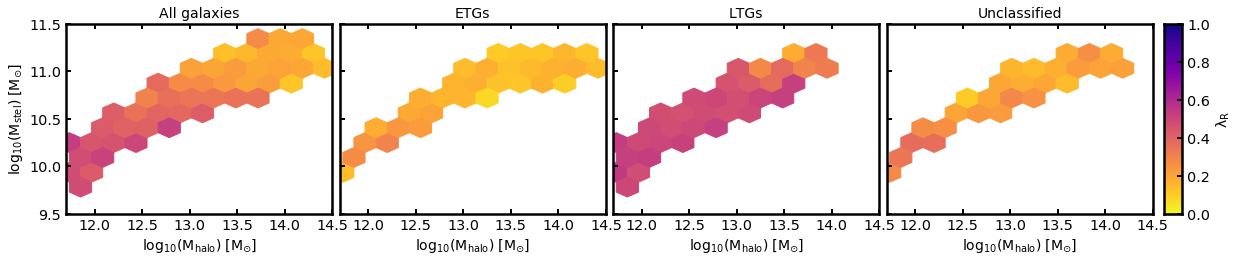

In [230]:
# Set up figure and image grid
fig= plt.figure(figsize=(20, 5))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

extent = [11.5, 15, 9, 11.5]
vrange = [0, 1]
grid = 15
mincnt = 3

hb = total.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[0], C=total.df.lambda_re.values, gridsize=grid, mincnt=mincnt, extent=extent, cmap='plasma_r', vmin=vrange[0], vmax=vrange[1])
etgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[1], C=etgs.df.lambda_re.values, gridsize=grid, mincnt=mincnt, extent=extent, cmap='plasma_r', vmin=vrange[0], vmax=vrange[1])
ltgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[2], C=ltgs.df.lambda_re.values, gridsize=grid, mincnt=mincnt, extent=extent, cmap='plasma_r', vmin=vrange[0], vmax=vrange[1])
unclassified.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[3], C=unclassified.df.lambda_re.values, gridsize=grid, mincnt=mincnt, extent=extent, cmap='plasma_r', vmin=vrange[0], vmax=vrange[1])

# Colorbar
cb = ax[0].cax.colorbar(hb)
cb.set_label_text('$\mathrm{\lambda_R}$', fontsize=14)
ax[0].cax.toggle_label(True)

titles = ['All galaxies', 'ETGs', 'LTGs', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.set_xlabel('$\mathrm{log_{10}(M_{halo}) \; [M_{\odot}]}$', fontsize=14)
    axis.set_title(titles[ind], fontsize=14)
    
ax[0].set_ylabel('$\mathrm{log_{10}(M_{stel}) \; [M_{\odot}]}$', fontsize=14)
ax[0].set_ylim([9.5, 11.5])
ax[0].set_xlim([11.7, 14.5])

plt.savefig(outpath+'mstel_mhalo_c-lambdaR-double-bin.pdf', format='pdf', bbox_inches='tight')


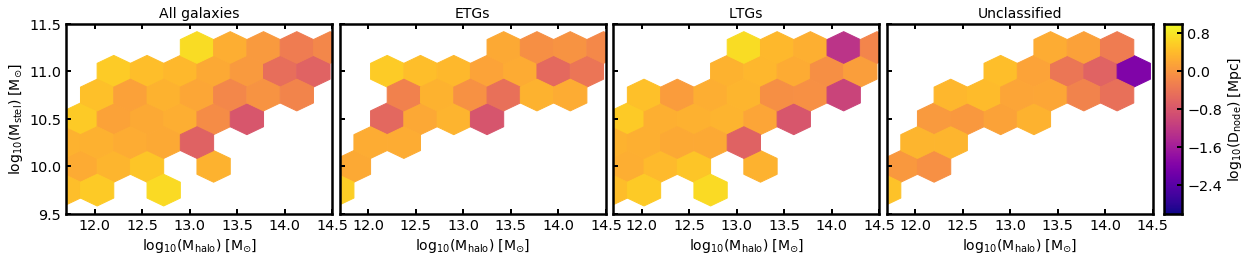

In [212]:
fig= plt.figure(figsize=(20, 5))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

extent = [11.5, 15, 9, 11.5]
vrange = [-3, 0.5]
grid = 10
hb = total.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[0], C=total.df.log_dnode_norm.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])
hb = etgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[1], C=etgs.df.log_dnode_norm.values, gridsize=grid, extent=extent,  cmap='plasma', vmin=vrange[0], vmax=vrange[1])
ltgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[2], C=ltgs.df.log_dnode_norm.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])
unclassified.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[3], C=unclassified.df.log_dnode_norm.values, extent=extent, gridsize=grid, cmap='plasma', vmin=vrange[0], vmax=vrange[1])

# Colorbar
cb = ax[0].cax.colorbar(hb)
cb.set_label_text('$\mathrm{log_{10}(D_{node}) \; [Mpc]}$', fontsize=14)
ax[0].cax.toggle_label(True)

titles = ['All galaxies', 'ETGs', 'LTGs', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.set_xlabel('$\mathrm{log_{10}(M_{halo}) \; [M_{\odot}]}$', fontsize=14)
    axis.set_title(titles[ind], fontsize=14)
    
ax[0].set_ylabel('$\mathrm{log_{10}(M_{stel}) \; [M_{\odot}]}$', fontsize=14)
ax[0].set_ylim([9.5, 11.5])
ax[0].set_xlim([11.7, 14.5])

plt.savefig(outpath+'mstel_mhalo_c-dnode-double-bin.pdf', format='pdf', bbox_inches='tight')


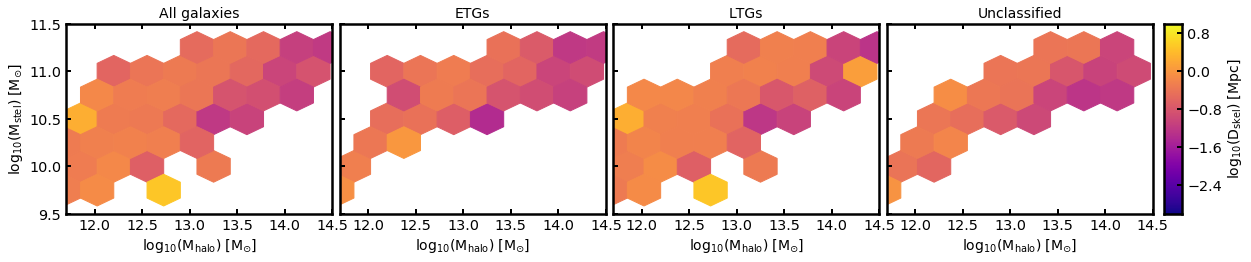

In [213]:
fig= plt.figure(figsize=(20, 5))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

extent = [11.5, 15, 9, 11.5]
vrange = [-3, 0.5]
grid = 10
hb = total.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[0], C=total.df.log_dskel_norm.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])
hb = etgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[1], C=etgs.df.log_dskel_norm.values, gridsize=grid, extent=extent,  cmap='plasma', vmin=vrange[0], vmax=vrange[1])
ltgs.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[2], C=ltgs.df.log_dskel_norm.values, gridsize=grid, extent=extent, cmap='plasma', vmin=vrange[0], vmax=vrange[1])
unclassified.plot_hexbin('halo_mass_stel', 'nsa_elpetro_mass_logscale', ax[3], C=unclassified.df.log_dskel_norm.values, extent=extent, gridsize=grid, cmap='plasma', vmin=vrange[0], vmax=vrange[1])

# Colorbar
cb = ax[0].cax.colorbar(hb)
cb.set_label_text('$\mathrm{log_{10}(D_{skel}) \; [Mpc]}$', fontsize=14)
ax[0].cax.toggle_label(True)

titles = ['All galaxies', 'ETGs', 'LTGs', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.set_xlabel('$\mathrm{log_{10}(M_{halo}) \; [M_{\odot}]}$', fontsize=14)
    axis.set_title(titles[ind], fontsize=14)

ax[0].set_ylabel('$\mathrm{log_{10}(M_{stel}) \; [M_{\odot}]}$', fontsize=14)
ax[0].set_ylim([9.5, 11.5])
ax[0].set_xlim([11.7, 14.5])

plt.savefig(outpath+'mstel_mhalo_c-dskel-double-bin.pdf', format='pdf', bbox_inches='tight')
